<a href="https://colab.research.google.com/github/arjun-gaikwad-34/ArjunGaikwad_AIML_Bootcamp_Genzeon_2023/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = '/content/drive/MyDrive/DATA/Mall_Customers.csv'
df = pd.read_csv(dataset)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Finding the missing values in all columns

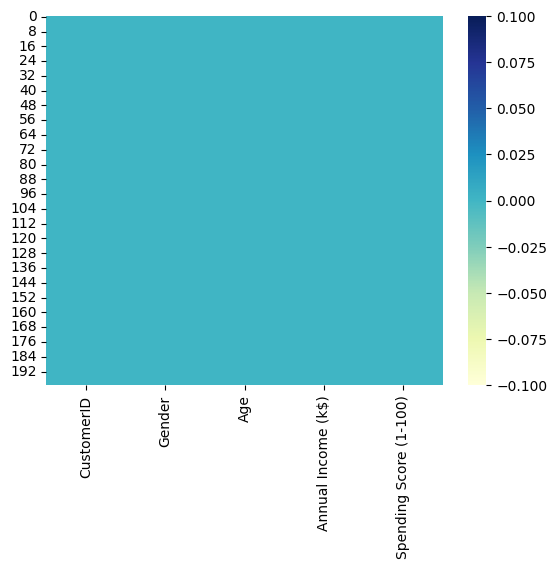

In [ ]:
sns.heatmap(df.isnull(), cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
df = df.drop(['CustomerID'], axis = 1)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Using any() with isnull() or isna()

In [ ]:
has_missing_values = df.isnull().any().any()
has_missing_values

False

missing_counts = df.isnull().sum()

In [ ]:
missing_counts = df.isnull().sum()
missing_counts

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

df.hist(bins = 50, figsize = (20,10))
plt.show()

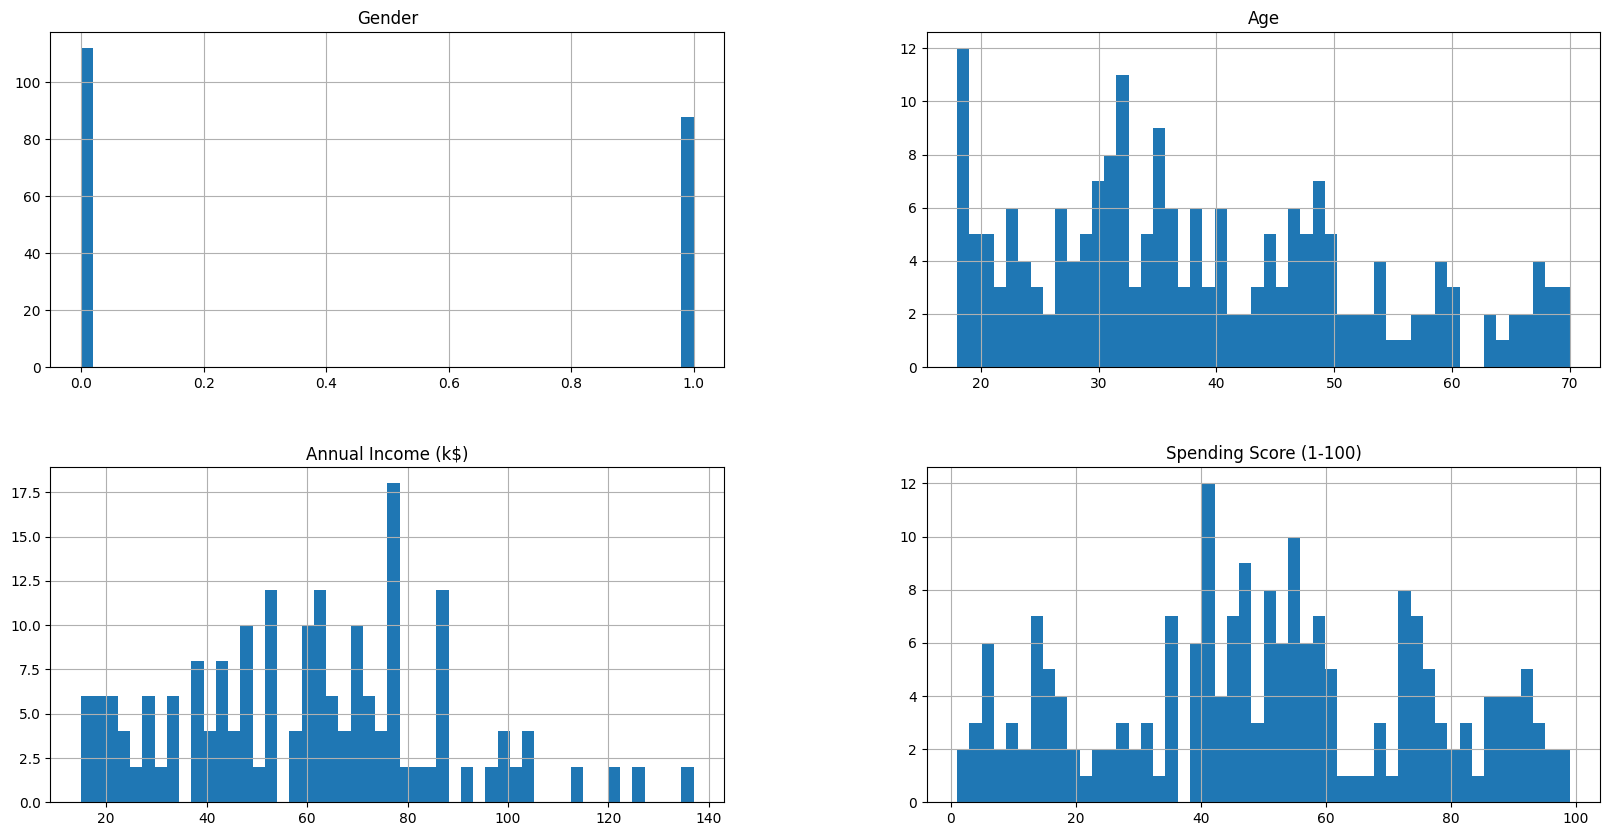

In [ ]:
df.hist(bins = 50, figsize = (20,10))
plt.show()

Correlation Matrix

<Axes: >

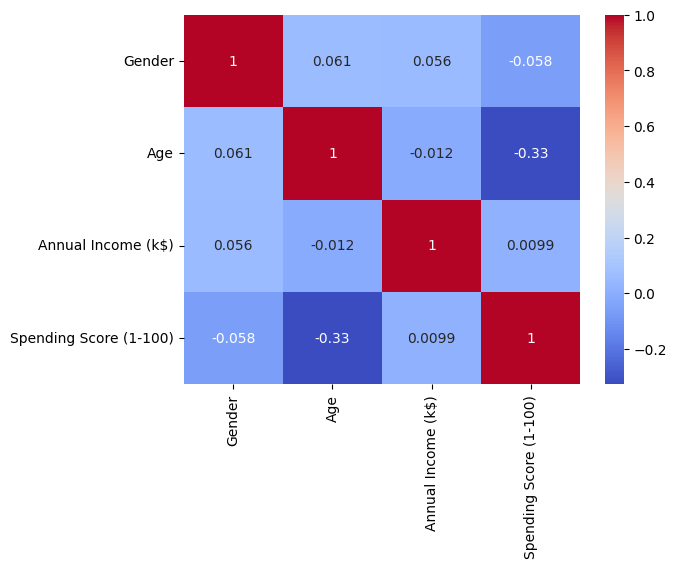

In [ ]:
#Correlation Data
correlation_data = df.corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')

sns.plotting_context('notebook')
sns.pairplot(df,hue = 'label', palette = 'tab20')

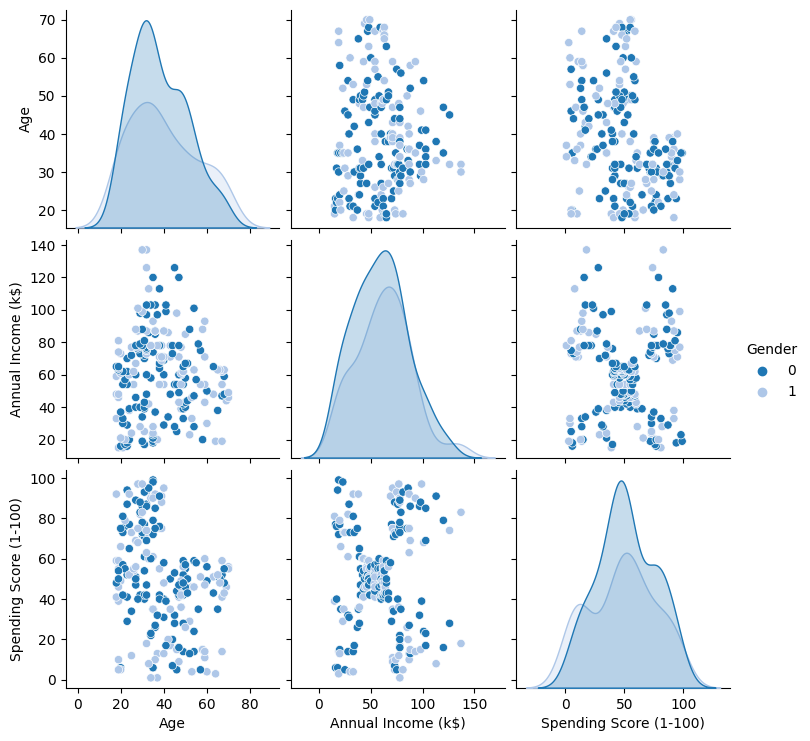

In [ ]:
sns.plotting_context('notebook')
sns.pairplot(df,hue = 'Gender', palette = 'tab20')

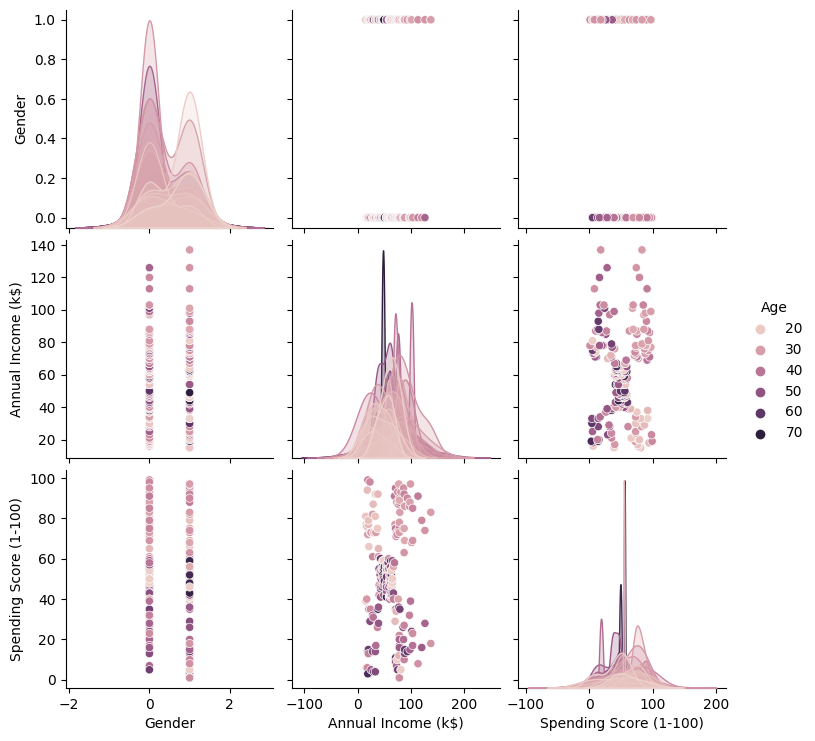

In [ ]:

# Generate a custom color palette based on age
age_palette = sns.color_palette("tab20", n_colors=len(df['Age'].unique()))
age_palette = age_palette[::-1]  # Reverse the order to start with lighter shades

# Set the custom color palette and plot the pairplot
sns.set_palette(age_palette)
sns.pairplot(df, hue='Age')

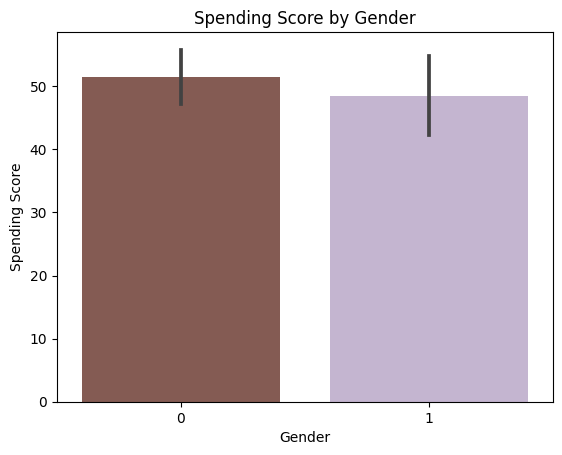

In [ ]:
sns.barplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Spending Score by Gender')
plt.show()

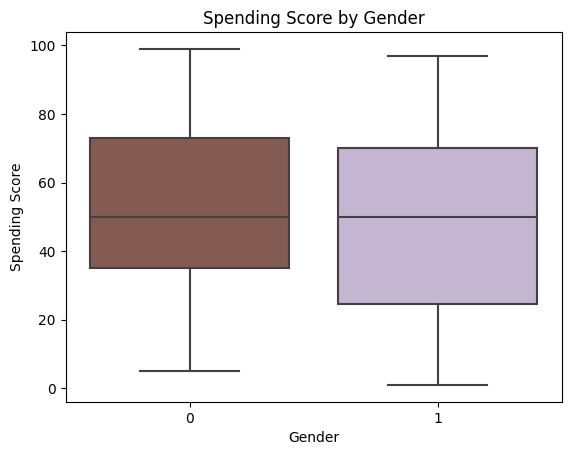

In [ ]:
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Spending Score by Gender')
plt.show()

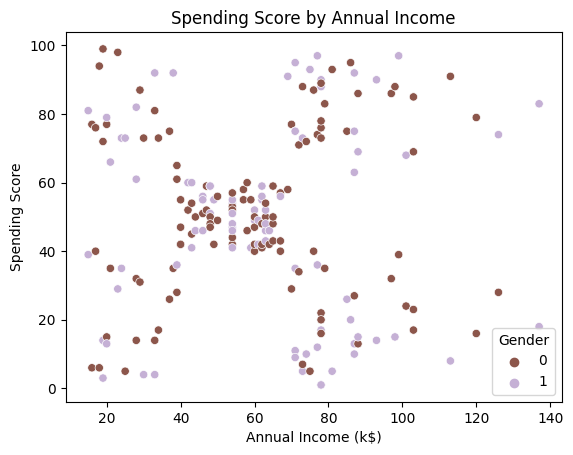

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Spending Score by Annual Income')
plt.show()

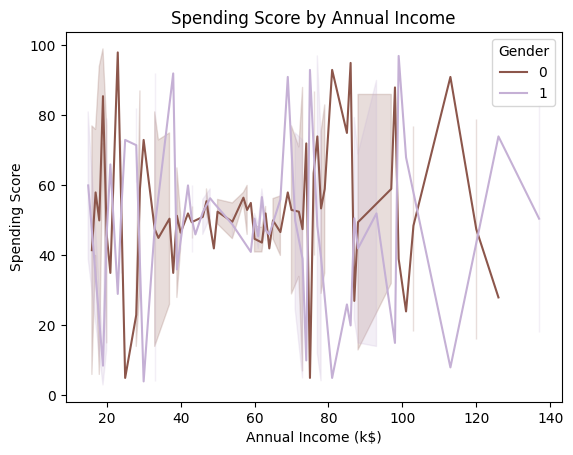

In [ ]:
sns.lineplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Spending Score by Annual Income')
plt.show()

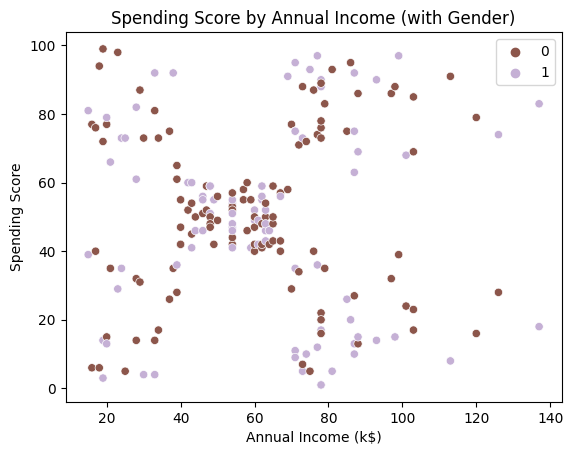

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Spending Score by Annual Income (with Gender)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Group the dataframe by 'Gender' and calculate the metrics
gender_metrics = df.groupby('Gender')['Spending Score (1-100)'].agg(['max', 'min', 'mean', 'median'])

# Find the rows with the highest and lowest spending scores for each gender
highest_spending = df.loc[df.groupby('Gender')['Spending Score (1-100)'].idxmax()]
lowest_spending = df.loc[df.groupby('Gender')['Spending Score (1-100)'].idxmin()]

# Print the results
print("Gender-wise Metrics:")
print(gender_metrics)
print("\nGender-wise Highest Spending Score:")
print(highest_spending)
print("\nGender-wise Lowest Spending Score:")
print(lowest_spending)


Gender-wise Metrics:
        max  min       mean  median
Gender                             
0        99    5  51.526786    50.0
1        97    1  48.511364    50.0

Gender-wise Highest Spending Score:
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
11        0   35                  19                      99
145       1   28                  77                      97

Gender-wise Lowest Spending Score:
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
22        0   46                  25                       5
156       1   37                  78                       1


In [ ]:
# Group the dataframe by 'Gender' and calculate the metrics
gender_metrics = df.groupby('Gender')['Annual Income (k$)'].agg(['max', 'min', 'mean', 'median'])

# Find the rows with the highest and lowest Annual Income (k$) for each gender
highest_spending = df.loc[df.groupby('Gender')['Annual Income (k$)'].idxmax()]
lowest_spending = df.loc[df.groupby('Gender')['Annual Income (k$)'].idxmin()]

# Print the results
print("Gender-wise Metrics:")
print(gender_metrics)
print("\nGender-wise Highest 'Annual Income (k$):")
print(highest_spending)
print("\nGender-wise Lowest 'Annual Income (k$):")
print(lowest_spending)

Gender-wise Metrics:
        max  min       mean  median
Gender                             
0       126   16  59.250000    60.0
1       137   15  62.227273    62.5

Gender-wise Highest 'Annual Income (k$):
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
196       0   45                 126                      28
198       1   32                 137                      18

Gender-wise Lowest 'Annual Income (k$):
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
2       0   20                  16                       6
0       1   19                  15                      39


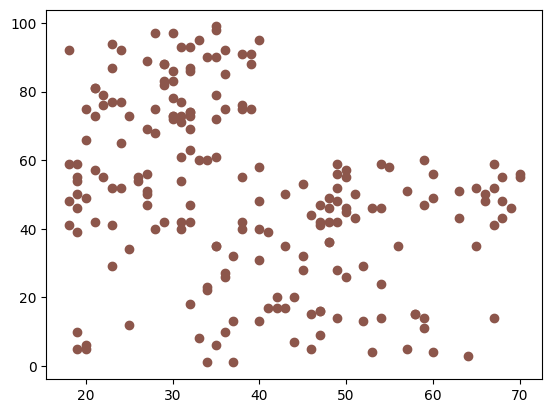

In [ ]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.show()

In [ ]:
# Filter the dataframe for the age bracket of 18 to 40
age_bracket = df[(df['Age'] >= 18) & (df['Age'] <= 40)]

# Extract the spending score of people in the age bracket
spending_score = age_bracket['Spending Score (1-100)']

# Print the spending score of people in the age bracket
print("Spending Score of People in the Age Bracket 18 to 40:")
print(spending_score)

Spending Score of People in the Age Bracket 18 to 40:
0      39
1      81
2       6
3      77
4      40
       ..
193    91
195    79
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 122, dtype: int64


Directly Model

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3) #2 centroids
clusters = km.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

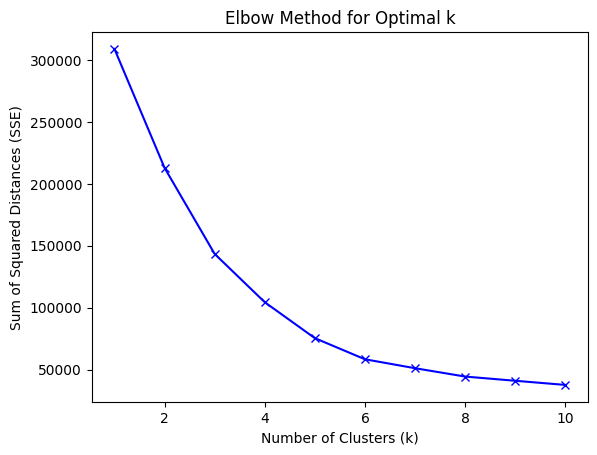

In [ ]:
# Define the range of k values to try
k_values = range(1, 11)
sse = []
# Perform k-means clustering for each value of k
for k in k_values:
    # Create and fit the k-means model
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)

    # Calculate the sum of squared distances (SSE)
    sse.append(kmeans.inertia_)

# Plot the SSE values
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 10) #2 centroids
clusters = km.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters


array([8, 2, 8, 2, 8, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 8, 2, 8, 2, 8, 2,
       3, 2, 3, 2, 8, 2, 8, 2, 3, 2, 3, 2, 3, 2, 3, 2, 8, 2, 9, 2, 8, 5,
       8, 2, 9, 5, 5, 5, 9, 5, 5, 9, 9, 0, 9, 9, 5, 9, 9, 5, 9, 9, 9, 5,
       0, 9, 5, 5, 9, 0, 9, 9, 9, 5, 0, 0, 5, 0, 9, 5, 9, 0, 5, 0, 9, 5,
       5, 0, 9, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 0, 9, 5, 0, 5, 9, 0, 9, 9,
       9, 5, 0, 5, 5, 5, 9, 0, 0, 0, 5, 0, 0, 1, 6, 1, 0, 1, 6, 1, 6, 1,
       5, 1, 6, 1, 6, 1, 6, 1, 6, 1, 0, 1, 6, 1, 0, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 0, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4,
       7, 4], dtype=int32)

In [ ]:
df['label'] = clusters

In [ ]:
df

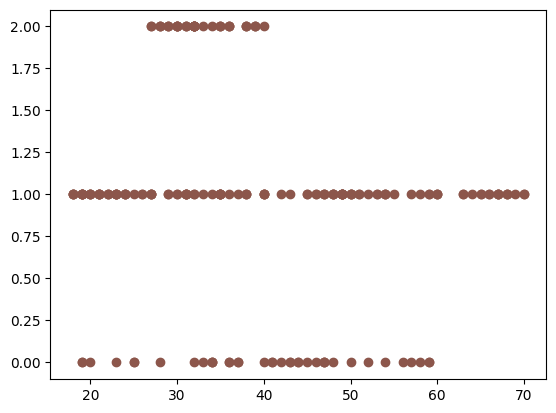

In [ ]:
plt.scatter(df['Age'],df['label'])
plt.show()

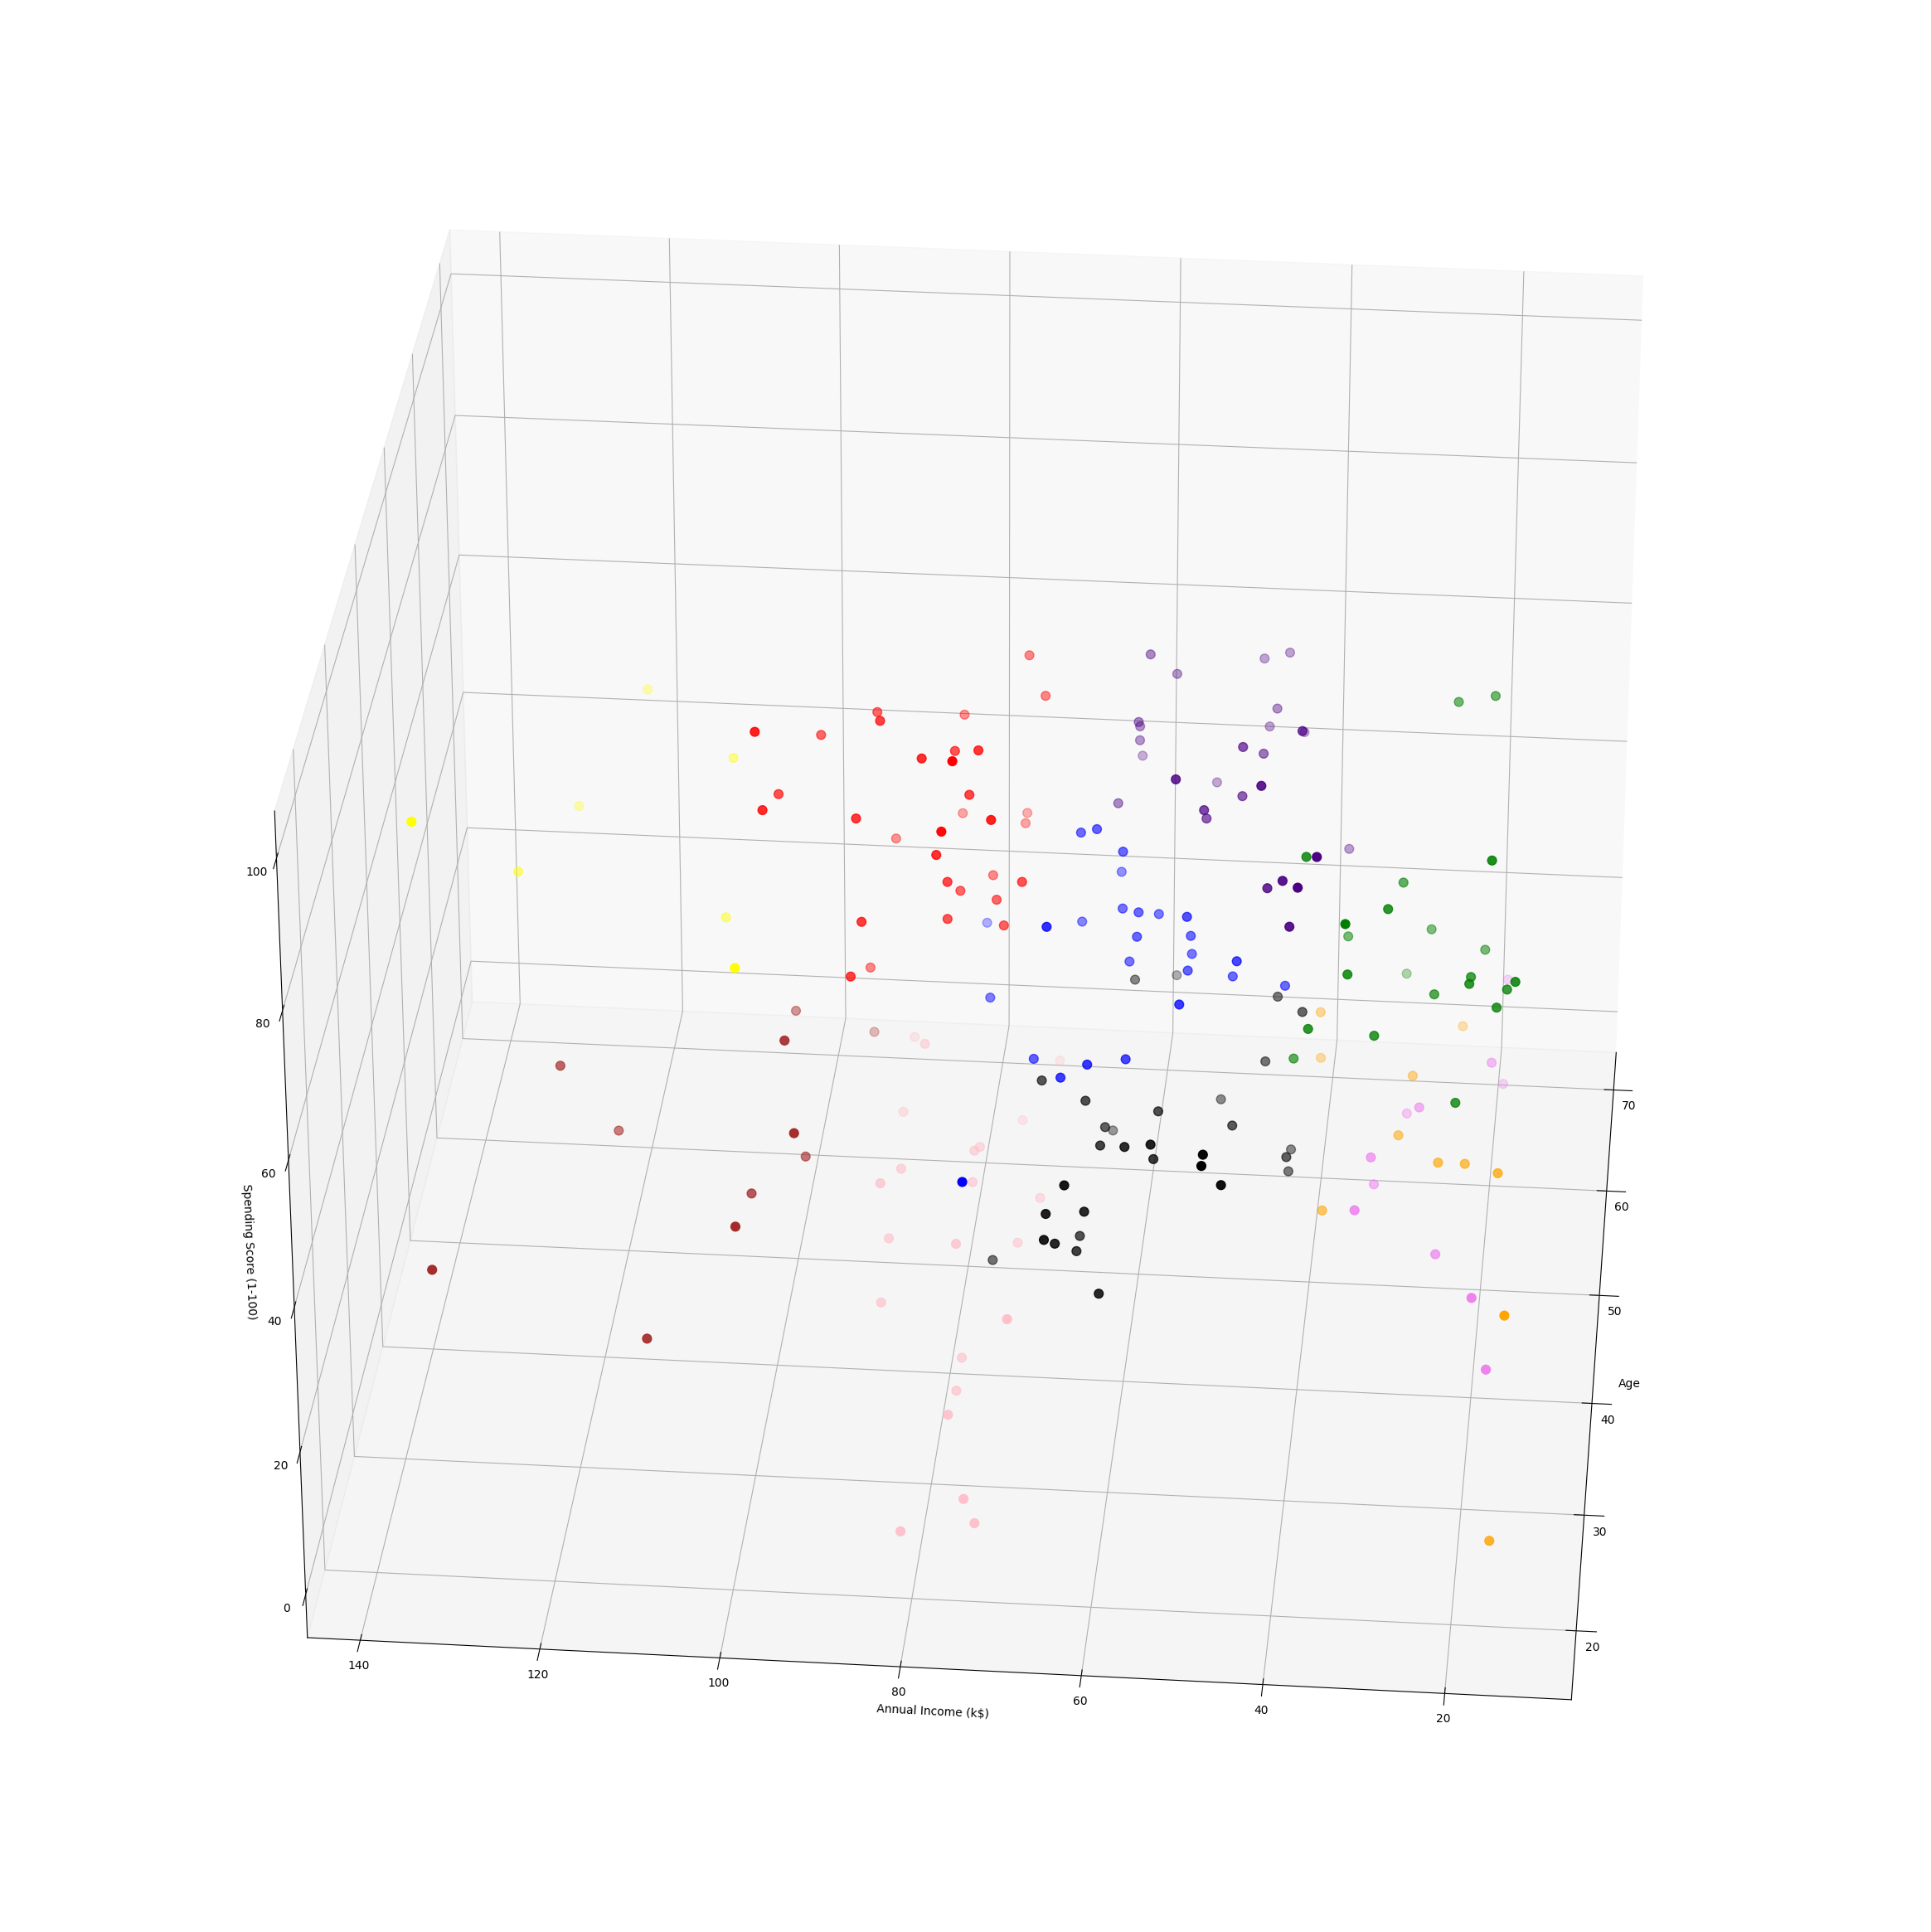

In [ ]:
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure(figsize=(40,30))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)

ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)

ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='violet', s=60)

ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='yellow', s=60)

ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='black', s=60)

ax.scatter(df.Age[df.label == 6], df["Annual Income (k$)"][df.label == 6], df["Spending Score (1-100)"][df.label == 6], c='pink', s=60)

ax.scatter(df.Age[df.label == 7], df["Annual Income (k$)"][df.label == 7], df["Spending Score (1-100)"][df.label == 7], c='brown', s=60)

ax.scatter(df.Age[df.label == 8], df["Annual Income (k$)"][df.label == 8], df["Spending Score (1-100)"][df.label == 8], c='orange', s=60)

ax.scatter(df.Age[df.label == 9], df["Annual Income (k$)"][df.label == 9], df["Spending Score (1-100)"][df.label == 9], c='indigo', s=60)


ax.view_init(30, 185)

plt.xlabel("Age")

plt.ylabel("Annual Income (k$)")

ax.set_zlabel('Spending Score (1-100)')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

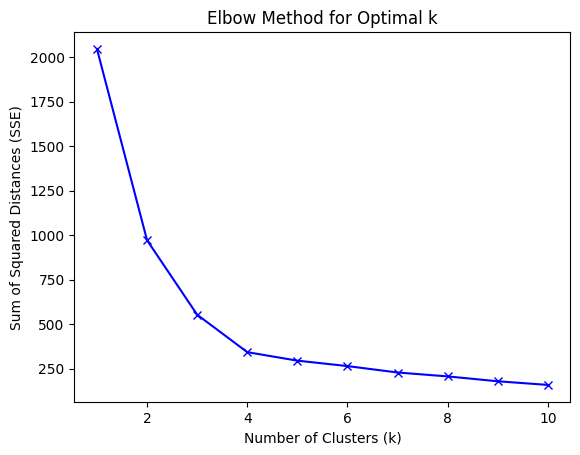

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=200, centers=4, random_state=0)

# Initialize lists to store SSE values for different k
sse = []

# Define the range of k values to try
k_values = range(1, 11)

# Perform k-means clustering for each value of k
for k in k_values:
    # Create and fit the k-means model
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)

    # Calculate the sum of squared distances (SSE)
    sse.append(kmeans.inertia_)

# Plot the SSE values
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()